In [39]:
!pip install 'numpy<2'

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [1]:
import numpy as np
print(np.__version__)

1.26.4


In [2]:
import random
from collections import defaultdict
import shutil
import urllib.request
import os
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
#!/usr/bin/env python3
# Download the 56 zip files in Images_png in batches

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

extract_dir = './data'
os.makedirs(extract_dir, exist_ok = True)

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

    print('Extracting ' + fn + '...')
    with tarfile.open(fn) as tar:
        tar.extractall(path=extract_dir) # Extract file in data dir --> Images (original folder with all the images)

print("Download complete. Please check the checksums")

downloadingimages_01.tar.gz...
Extracting images_01.tar.gz...
downloadingimages_02.tar.gz...
Extracting images_02.tar.gz...
downloadingimages_03.tar.gz...
Extracting images_03.tar.gz...
downloadingimages_04.tar.gz...
Extracting images_04.tar.gz...
downloadingimages_05.tar.gz...
Extracting images_05.tar.gz...
downloadingimages_06.tar.gz...
Extracting images_06.tar.gz...
downloadingimages_07.tar.gz...
Extracting images_07.tar.gz...
downloadingimages_08.tar.gz...
Extracting images_08.tar.gz...
downloadingimages_09.tar.gz...
Extracting images_09.tar.gz...
downloadingimages_10.tar.gz...
Extracting images_10.tar.gz...
downloadingimages_11.tar.gz...
Extracting images_11.tar.gz...
downloadingimages_12.tar.gz...
Extracting images_12.tar.gz...
Download complete. Please check the checksums


In [2]:
random.seed(42)

def get_patient_id(filename): # Extract patient id from filename
    return filename.split('_')[0] # 00000001_000.png --> 00000001

def read_list(filepath):
    with open(filepath, 'r') as f: # Read text file and return a list of non-empty lines
        return [line.strip() for line in f if line.strip()]

def group_by_patient(file_list): # Group all image filenames by patient ID
    patient_dict = defaultdict(list)
    for filename in file_list:
        patient_id = get_patient_id(filename)
        patient_dict[patient_id].append(filename)
    return patient_dict

def copy_images(file_list, src_dir, dst_dir): # Copy image files from source dir to destination dir
    os.makedirs(dst_dir, exist_ok=True) # Create when doesn't exist
    for fname in file_list:
        src = os.path.join(src_dir, fname)
        dst = os.path.join(dst_dir, fname)
        if os.path.exists(src):
            shutil.copy(src, dst)
        else:
            print(f"Bestand niet gevonden: {src}")





In [3]:
# load list of filenames for train/val and test
trainval_list = read_list('data/train_val_list.txt')
test_list  = read_list('data/test_list.txt')

In [4]:
patient_dict = group_by_patient(trainval_list) #Group train/val files by patient id
patient_ids = list(patient_dict.keys())
random.shuffle(patient_ids) # Shuffle patient ids to split into train and val without overlap

split_idx = int(0.9 * len(patient_ids)) # 90% to train, 10% to val
train_ids = patient_ids[:split_idx]
val_ids = patient_ids[split_idx:]
# Create the train and validation splits based on patient ID
train_split = [f for patient_id in train_ids for f in patient_dict[patient_id]]
val_split = [f for patient_id in val_ids for f in patient_dict[patient_id]]

In [23]:
import shutil

def clear_folder(folder):
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

clear_folder('./data/train')
# clear_folder('./data/val')
# clear_folder('./data/test')

# Daarna pas copy_images aanroepen


In [26]:
# Copy images into separate train, val, and test folders
extract_dir = './data'
copy_images(train_split, os.path.join(extract_dir, 'images'), './data/train')

In [ ]:
copy_images(val_split, os.path.join(extract_dir, 'images'), './data/val')
copy_images(test_list, os.path.join(extract_dir, 'images'), './data/test')

In [6]:
with open("split_train.txt", "w") as f:
    f.write("\n".join(train_split) + "\n")

with open("split_val.txt", "w") as f:
    f.write("\n".join(val_split) + "\n")

with open("split_test.txt", "w") as f:
    f.write("\n".join(test_list) + "\n")

In [7]:
print("\n Done:")
print(f"Train: {len(train_split)}")
print(f"Val:   {len(val_split)}")
print(f"Test:  {len(test_list)}")
print(f"Total: {len(test_list) + len(val_split) + len(train_split)}") # should be 112120


 Done:
Train: 77717
Val:   8807
Test:  25596
Total: 112120


In [20]:
import os

image_dir = './data/images'
image_extensions = ['.png']

# Filter alle image-bestanden
image_files = [f for f in os.listdir(image_dir) if os.path.splitext(f)[1].lower() in image_extensions]

print(f"Aantal afbeeldingen in ./data/images: {len(image_files)}")


Aantal afbeeldingen in ./data/images: 112120


In [27]:
import os

image_dir = './data/train'
image_extensions = ['.png']

# Filter alle image-bestanden
image_files = [f for f in os.listdir(image_dir) if os.path.splitext(f)[1].lower() in image_extensions]

print(f"Aantal afbeeldingen in ./data/train: {len(image_files)}")


Aantal afbeeldingen in ./data/train: 77717


In [18]:


image_dir = './data/test'
image_extensions = ['.png']

# Filter alle image-bestanden
image_files = [f for f in os.listdir(image_dir) if os.path.splitext(f)[1].lower() in image_extensions]

print(f"Aantal afbeeldingen in ./data/test: {len(image_files)}")


Aantal afbeeldingen in ./data/test: 25596


In [19]:


image_dir = './data/val'
image_extensions = ['.png']

# Filter alle image-bestanden
image_files = [f for f in os.listdir(image_dir) if os.path.splitext(f)[1].lower() in image_extensions]

print(f"Aantal afbeeldingen in ./data/val: {len(image_files)}")


Aantal afbeeldingen in ./data/val: 8807


In [9]:
# CSVs for each split
df = pd.read_csv('./data/Data_Entry_2017_v2020.csv')

In [10]:
 # Set of filenames per subset
train_filenames = set(train_split)
val_filenames = set(val_split)
test_filenames = set(test_list)

In [11]:
# Filter rows from dataframe
train_labels = df[df['Image Index'].isin(train_filenames)]
val_labels = df[df['Image Index'].isin(val_filenames)]
test_labels = df[df['Image Index'].isin(test_filenames)]

In [12]:
# Save in different files
train_labels.to_csv('./data/train_labels.csv', index=False)
val_labels.to_csv('./data/val_labels.csv', index=False)
test_labels.to_csv('./data/test_labels.csv', index=False)

In [3]:
train = pd.read_csv('./data/train_labels.csv')
val = pd.read_csv('./data/val_labels.csv')
test = pd.read_csv('./data/test_labels.csv')

print(f"Aantal train entries: {len(train)}")
print(f"Aantal val entries: {len(val)}")
print(f"Aantal test entries: {len(test)}")


Aantal train entries: 77717
Aantal val entries: 8807
Aantal test entries: 25596


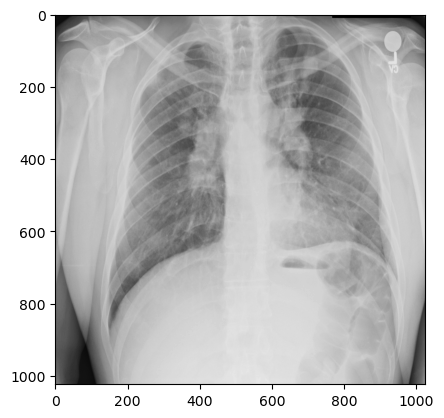

In [17]:
# Path to train set
train_dir = './data/train'

# Get filenames from train dir
train_images = os.listdir(train_dir)

# Choose random image
sample_image = random.choice(train_images)

# Load the image with Pil
image_path = os.path.join(train_dir, sample_image)
image = Image.open(image_path)

# Shows the image
plt.imshow(image, cmap = 'grey')
plt.axis('on')
plt.show()
